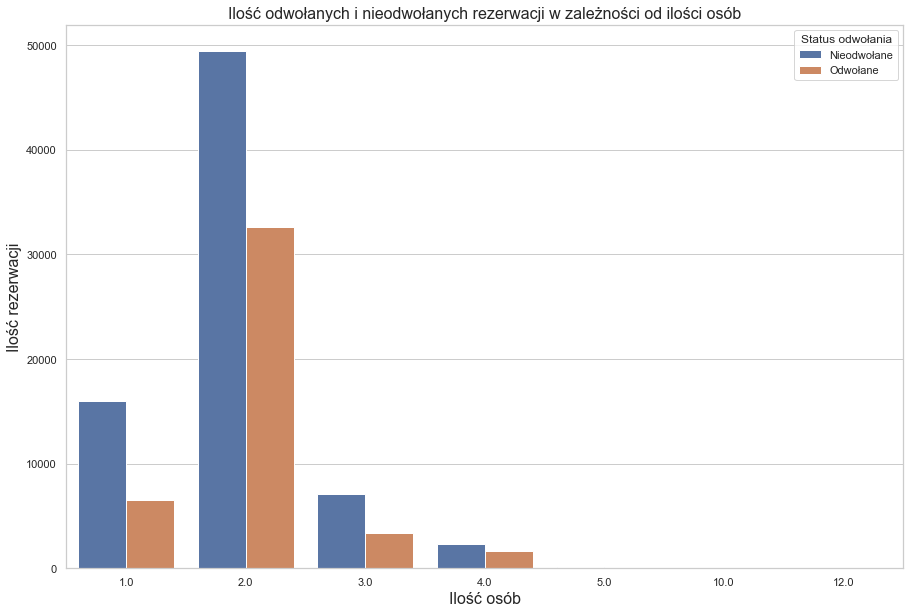

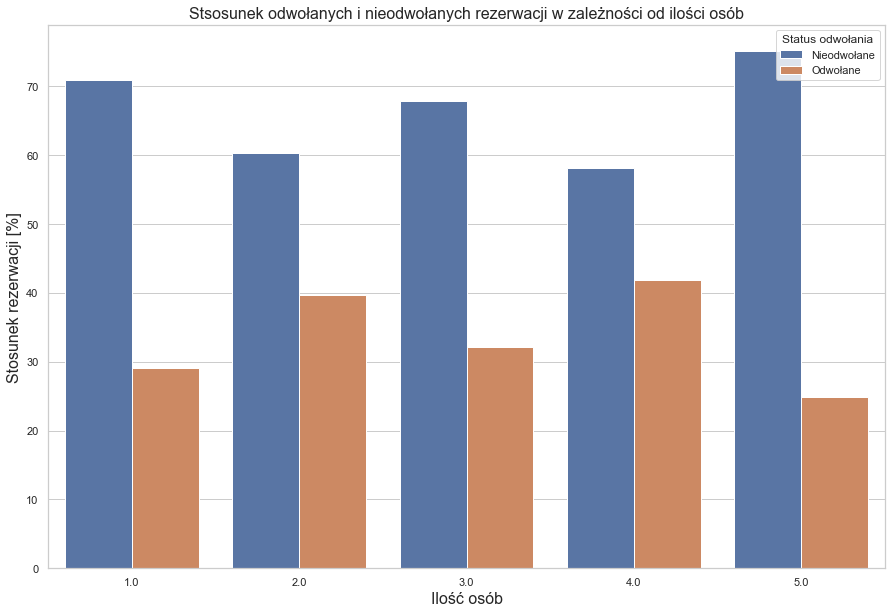

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
# tabela_glowna.isna().any()

tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek['all'] = tabela_wiek['adults'] + tabela_wiek['children'] + tabela_wiek['babies']

tabela_wiek['ilosc'] = 1

tabela_all = tabela_wiek[tabela_wiek['all']!= 0][['is_canceled','all', 'ilosc']]
tabela_all

tabela_all_grup = tabela_all.groupby(by=['is_canceled','all'])
tabela_all_grup.count()#powyzej 12 osób jest zawsze odwoływane i dla 6 osob

W = []
status_odwoalania = []
ilosc_osob = []

for key, value in tabela_all_grup:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    ilosc_osob.append(n)

rezerwacje = tabela_all_grup.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

wykres_3={
    'status_odwolania':status_odwoalania,
    'ilosc_osob':ilosc_osob,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
wykres_3
wykres_3_df = pd.DataFrame(wykres_3)
wykres_3_df
wykres_3_df_r = wykres_3_df[(wykres_3_df['ilosc_osob']!=6) & (wykres_3_df['ilosc_osob']<13)]

tab_1_o = wykres_3_df_r[wykres_3_df_r['status_odwolania'] == 0][['ilosc_osob', 'ilosc_rezerwacji']]
tab_1_o
tab_1_n = wykres_3_df_r[wykres_3_df_r['status_odwolania'] == 1][['ilosc_osob', 'ilosc_rezerwacji']]
tab_1_n

tab_a_all= pd.merge(tab_1_o, tab_1_n, on="ilosc_osob", how="left")
tab_a_all['suma'] = tab_a_all['ilosc_rezerwacji_x'] +tab_a_all['ilosc_rezerwacji_y']
tab_a_all_s = tab_a_all[['ilosc_osob', 'suma']]
tab_a_all_s
tab_a_all_s2 = pd.concat([tab_a_all_s, tab_a_all_s])
tab_a_all_s2

wykres_3_df_s = pd.merge(wykres_3_df_r, tab_a_all_s2, on="ilosc_osob", how="left")
wykres_3_dd = wykres_3_df_s.drop_duplicates(subset=["status_odwolania",'ilosc_osob']).reset_index(drop=True)
wykres_3_dd

labels=["Nieodwołane","Odwołane"]
wykres_3_dd["status_odwolania_2"] = wykres_3_dd["status_odwolania"].map(dict(zip(range(0,2), labels)))

x = wykres_3_dd['ilosc_osob'].values.tolist()
y = wykres_3_dd['ilosc_rezerwacji'].values.tolist()
# def add_value_label(x_list,y_list):
#     for i in range(len(x_list)):
#         plt.text(i, round(y_list[i], 2), round(y_list[i], 2), ha="center")

f, ax = plt.subplots(figsize=(15, 10))
wykres_1 = sns.set_theme(style="whitegrid")
wykres_1 = sns.barplot(x="ilosc_osob", y="ilosc_rezerwacji", hue="status_odwolania_2", data=wykres_3_dd)
# add_value_label(x, y)
wykres_1 = plt.title("Ilość odwołanych i nieodwołanych rezerwacji w zależności od ilości osób", fontsize=16)
wykres_1 = plt.xlabel("Ilość osób", fontsize=16)
wykres_1 = plt.ylabel("Ilość rezerwacji", fontsize=16)
wykres_1 = plt.legend(loc="upper right", title = "Status odwołania")

wykres_3_dd['procent'] = (wykres_3_dd['ilosc_rezerwacji']/wykres_3_dd['suma'])*100
z = wykres_3_dd['procent'].values.tolist()

wykres_3_dd_m = wykres_3_dd[wykres_3_dd['ilosc_osob']<10]

f, ax = plt.subplots(figsize=(15, 10))
wykres_2 = sns.set_theme(style="whitegrid")
wykres_2 = sns.barplot(x="ilosc_osob", y="procent", hue="status_odwolania_2", data=wykres_3_dd_m)
# add_value_label(x, z)
wykres_2 = plt.title("Stsosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób", fontsize=16)
wykres_2 = plt.xlabel("Ilość osób", fontsize=16)
wykres_2 = plt.ylabel("Stosunek rezerwacji [%]", fontsize=16)
wykres_2 = plt.legend(loc="upper right", title = "Status odwołania")